12


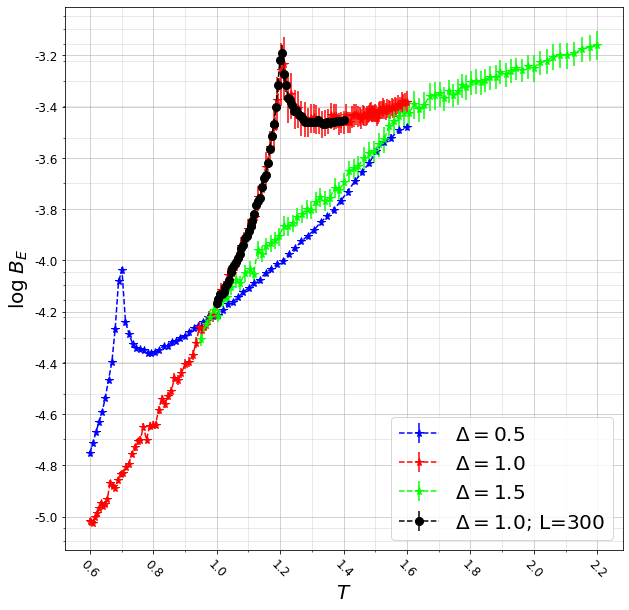

In [3]:
#matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import math
import sys
import os
from random import shuffle
from random import gauss
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fmin
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.optimize import curve_fit
import scipy.optimize as opt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from pylab import polyfit 
import matplotlib.ticker as ticker
from matplotlib import gridspec
from scipy.optimize import differential_evolution
import warnings
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle, Circle
#from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mticker


%matplotlib inline


def fit_func_cv(x, b, c, d):
        return  b*np.absolute(x - d)**(-c)
    
def fit_func(xrange_s, a, b):
    return a*xrange_s + b


######
#-----------------------------------------------------------------------------------------------------------------------
#######
#parameters of the code
######
#-----------------------------------------------------------------------------------------------------------------------
######

deltas = [0.5, 1.0, 1.5]
N = 80;

######
#- initialize plot
######
fig, ax1 = plt.subplots(figsize = (10,10))

cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='brg')
colors_size = [scalarMap.to_rgba(i/(len(deltas)-1)) for i in range(len(deltas))]


ax1.set_xlabel(r'$T$', fontsize = 20)
ax1.set_ylabel(r'$\log \; B_E$', color='black', fontsize = 20)

all_data_d = np.load('data_energy_binder_compare.npy',allow_pickle=True)

print(all_data_d.size)

#L^2 B_e
"""
for n in range(len(deltas)):
    #ax1.plot(range_x[n], data_thermo[n][:,2], color = colors_size[n], marker = '*', linestyle = '', markersize = 8.0, label = r'$\Delta =$'+str(deltas[n]))
    ax1.errorbar(all_data_d[n][0], N**2 *all_data_d[n][1], yerr = N**2 *(N)*all_data_d[n][2],  color = colors_size[n], marker = '*', linestyle = '--', markersize = 8.0, label = r'$\Delta =$'+str(deltas[n]))

ax1.errorbar(all_data_d[-1][0], (300)**2 *all_data_d[-1][1], yerr = (300)**2 *(300)*all_data_d[-1][2],  color = 'black', marker = 'o', linestyle = '--', markersize = 8.0, label = r'$\Delta =$'+str(deltas[n]) + '; L=300')
"""

#B_e
for n in range(len(deltas)):
    #ax1.plot(range_x[n], data_thermo[n][:,2], color = colors_size[n], marker = '*', linestyle = '', markersize = 8.0, label = r'$\Delta =$'+str(deltas[n]))
    ax1.errorbar(all_data_d[n][0], all_data_d[n][1], yerr = (N)*all_data_d[n][2],  color = colors_size[n], marker = '*', linestyle = '--', markersize = 8.0, label = r'$\Delta =$'+str(deltas[n]))

ax1.errorbar(all_data_d[-1][0], (300/N)**2 *all_data_d[-1][1], yerr = (300/N)**2 *(300)*all_data_d[-1][2],  color = 'black', marker = 'o', linestyle = '--', markersize = 8.0, label = r'$\Delta =$'+str(1.0) + '; L=300')


ax1.set_yscale('log')
#ax1.ticklabel_format(axis = 'x', style = 'plain')
#ax1.tick_params(axis='both', which='major', labelsize=16)
#ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
#ax1.ticklabel_format(axis = 'x', style = 'plain')
plt.legend(fontsize = 20)

#major_ticks = np.linspace(Tmin2, Tmax2, 5) 
#minor_ticks = np.linspace(Tmin2, Tmax2, 9) 

Tmin2 = 0.6
Tmax2 = 2.2
major_ticks = np.arange(Tmin2, Tmax2+0.0001, 0.2) 
minor_ticks = np.arange(Tmin2, Tmax2+0.0001, 0.1) 
ax1.set_xticks(major_ticks)     
tick_print = []
for elem in major_ticks:
    tick_print.append('{:.1f}'.format(elem))
ax1.set_xticks(minor_ticks, minor=True)  
ax1.set_xticklabels(tick_print, rotation=315, fontsize = 12) 

#y ticks
yticksvalpre = np.arange(-5, -3, 0.2)
yticksval = 10**(yticksvalpre)

ytick_print = []
for elem in yticksvalpre:
    ytick_print.append(r'{:.1f}'.format(elem))
    
ax1.set_yticks(yticksval)
ax1.set_yticklabels(ytick_print, fontsize = 12) 

#ax1.set_yticks(yticksvalmin, minor=True)  
#ax1.set_yticklabels(ytick_print, fontsize = 20) 

#ax1.set_yticklabels(ax1.get_yticks(), fontsize = 20)
#ax3.xaxis.set_label_coords(1.08, 0.01)
ax1.grid(which='minor', alpha=0.35)                                                
ax1.grid(which='major', alpha=0.7)


plt.savefig('./CompareBinderEnergy.png', format='png', dpi = 100, bbox_inches='tight')
plt.show()


In [2]:
all_data_d

array([[array([0.6       , 0.60941433, 0.61897637, 0.62868844, 0.6385529 ,
       0.64857215, 0.65874859, 0.66908472, 0.67958302, 0.69024604,
       0.70107638, 0.71207665, 0.72324952, 0.73459769, 0.74612393,
       0.75783102, 0.7697218 , 0.78179915, 0.794066  , 0.80652533,
       0.81918015, 0.83203353, 0.84508859, 0.85834848, 0.87181644,
       0.88549571, 0.89938962, 0.91350153, 0.92783486, 0.9423931 ,
       0.95717975, 0.97219842, 0.98745274, 1.00294641, 1.01868319,
       1.03466688, 1.05090136, 1.06739057, 1.08413851, 1.10114923,
       1.11842686, 1.13597558, 1.15379966, 1.1719034 , 1.1902912 ,
       1.20896751, 1.22793687, 1.24720386, 1.26677317, 1.28664953,
       1.30683775, 1.32734275, 1.34816948, 1.36932299, 1.39080841,
       1.41263094, 1.43479589, 1.45730861, 1.48017458, 1.50339932,
       1.52698847, 1.55094775, 1.57528296, 1.6       ]),
        array([1.77685293e-05, 1.93688978e-05, 2.14129207e-05, 2.33972000e-05,
       2.56237442e-05, 2.91399191e-05, 3.42484530e-0